In [6]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
# Function to remove invalid image files
def remove_invalid_images(base_dir):
    for folder in ["Cat", "Dog"]:
        folder_path = os.path.join(base_dir, folder)
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            try:
                with Image.open(file_path) as img:
                    img.verify()  # Verify the image
            except (IOError, SyntaxError):
                print(f"Removing invalid file: {file_path}")
                os.remove(file_path)



base_dir =  '/content/drive/MyDrive/PetImages'
train_dir = base_dir
remove_invalid_images(base_dir)

Removing invalid file: /content/drive/MyDrive/PetImages/Dog/Thumbs.db


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [11]:
datagen = ImageDataGenerator(
rescale=1.0/255.0,  # Normalize pixel values
validation_split=0.2,  # Split data into training (80%) and validation (20%)
rotation_range=20,  # Rotate images randomly
width_shift_range=0.2,  # Horizontally shift images
height_shift_range=0.2,  # Vertically shift images
shear_range=0.2,  # Apply shearing
zoom_range=0.2,  # Apply zooming
horizontal_flip=True  # Flip images horizontally
)


In [14]:
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

#Train the data
train_data = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

#valediate the data
val_data = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 1397 images belonging to 2 classes.
Found 349 images belonging to 2 classes.


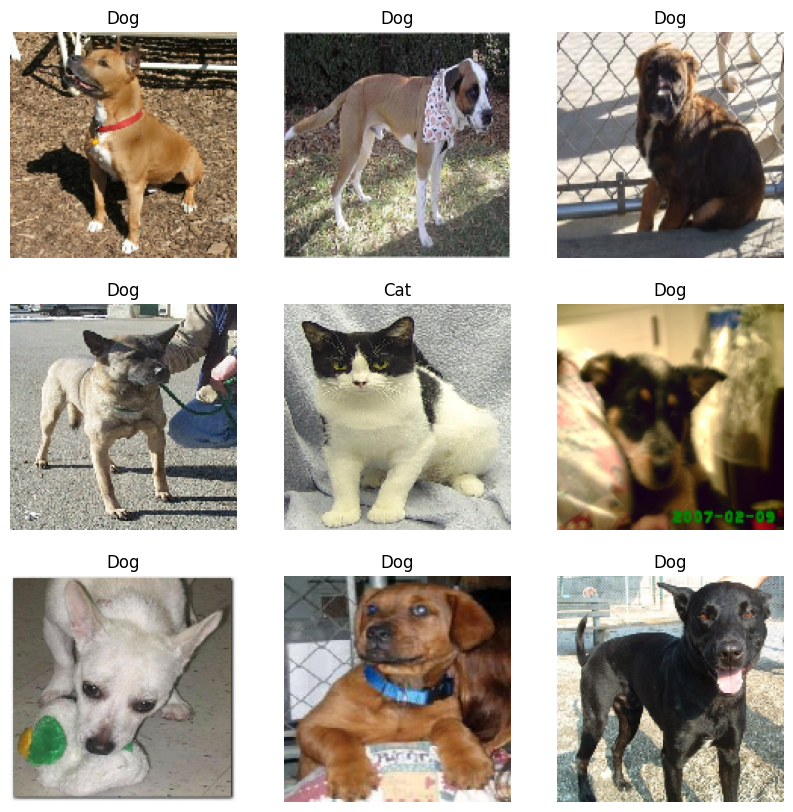

In [15]:
# Visualize some training images, Access a batch of images and labels, Plot the first 9 images
images, labels = next(train_data)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title('Dog' if labels[i] else 'Cat')
    plt.axis('off')
plt.show()

In [16]:
# Define the CNN model
# Sigmoid for binary classification
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [18]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.8455 - loss: 0.6267 - val_accuracy: 0.8596 - val_loss: 0.3865
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.8549 - loss: 0.4173 - val_accuracy: 0.8596 - val_loss: 0.3797
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.8584 - loss: 0.4091 - val_accuracy: 0.8596 - val_loss: 0.3700
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.8631 - loss: 0.3790 - val_accuracy: 0.8596 - val_loss: 0.3810
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.8700 - loss: 0.3483 - val_accuracy: 0.8596 - val_loss: 0.3551
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.8602 - loss: 0.3281 - val_accuracy: 0.8596 - val_loss: 0.3661
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.8509 - loss: 0.3555 - val_accuracy: 0.8625 - val_loss: 0.3595
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.8652 - loss: 0.2572 - val_accuracy: 0.8682 - val_loss: 0.390

In [19]:
val_loss, val_accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 621ms/step - accuracy: 0.8875 - loss: 0.4228
Validation Accuracy: 86.25%


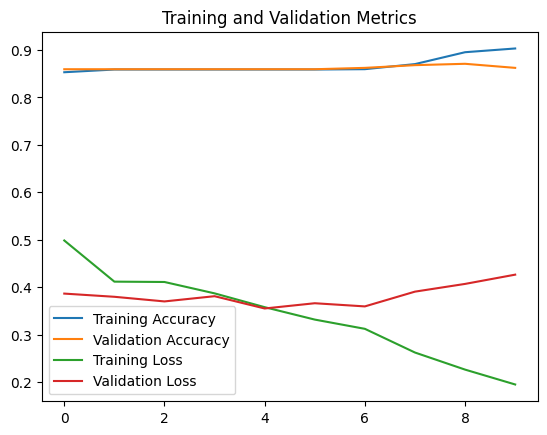

In [20]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Metrics')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


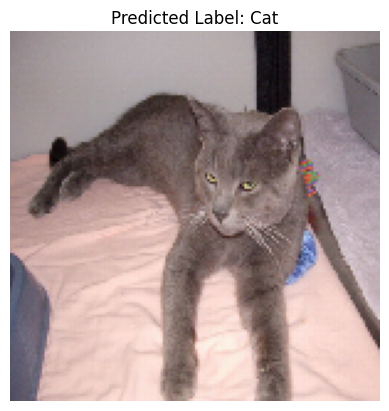

Predicted Label: Cat


In [35]:
# Path to the image
img_path = r'/content/drive/MyDrive/PetImages/Cat/8837.jpg'  # Replace with your image file path

# Preprocess the image
img = image.load_img(img_path, target_size=(150, 150))  # Resize to 150x150
img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make prediction
prediction = model.predict(img_array)
label = 'Cat' if prediction[0] > 0.5 else 'Dog'

# Display the image and the predicted label
plt.imshow(img)
plt.axis('off')  # Turn off axis
plt.title(f"Predicted Label: {label}")
plt.show()

print(f"Predicted Label: {label}")



In [36]:
from tensorflow.keras.saving import save_model
save_model(model, 'model.keras')

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.4MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 488kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.40MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.85MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



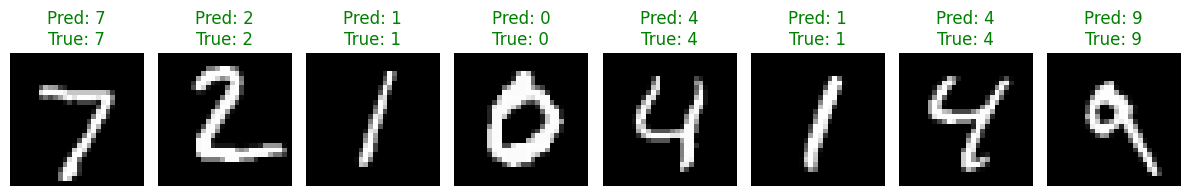

In [37]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load MNIST dataset
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=8, shuffle=True)
test_loader = DataLoader(test_data, batch_size=8, shuffle=False)

# Define a simple model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.fc(x)

# Initialize model, loss, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model for one epoch (for simplicity)
model.train()
for images, labels in train_loader:
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

# Evaluate on a single batch
model.eval()
data_iter = iter(test_loader)
images, labels = next(data_iter)
with torch.no_grad():
    outputs = model(images)
    _, predictions = torch.max(outputs, 1)

# Visualize the batch with correctness
fig, axes = plt.subplots(1, 8, figsize=(12, 2))
for i in range(8):
    axes[i].imshow(images[i].squeeze(), cmap='gray')
    is_correct = predictions[i].item() == labels[i].item()
    color = 'green' if is_correct else 'red'
    axes[i].set_title(f"Pred: {predictions[i].item()}\nTrue: {labels[i].item()}", color=color)
    axes[i].axis('off')

plt.tight_layout()
plt.show()